In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load datasets
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

# Display basic info
print("Train Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())

# Check missing values
print("\nMissing values in Train:\n", train_df.isnull().sum())
print("\nMissing values in Test:\n", test_df.isnull().sum())

# Quick statistical summary
print("\nTrain Data Description:\n", train_df.describe())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Test Data Info:
<class

In [60]:
# Fill missing values for numerical features
num_imputer = SimpleImputer(strategy="median")
train_df["Item_Weight"] = num_imputer.fit_transform(train_df[["Item_Weight"]])
test_df["Item_Weight"] = num_imputer.transform(test_df[["Item_Weight"]])

# Fill missing Outlet_Size with mode
train_df = train_df.assign(Outlet_Size=train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0]))
test_df = test_df.assign(Outlet_Size=test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0]))

# Check again for missing values
print("\nMissing values after treatment:\n", train_df.isnull().sum())



Missing values after treatment:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [61]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Type", "Outlet_Size", "Outlet_Identifier"]

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

# Apply One-Hot Encoding to categorical features
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure test dataset has the same columns as train dataset (except the target variable)
test_df = test_df.reindex(columns=train_df.columns.drop("Item_Outlet_Sales"), fill_value=0)

# Display encoded dataset structure
print("\nTrain Data After Encoding:\n", train_df.head())
print("\nTest Data After Encoding:\n", test_df.head())



Train Data After Encoding:
   Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.000000  Fruits and Vegetables   
4           NCD19         8.93         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales  Item_Fat_Content_1  \
0  249.8092                       1999          3735.1380                True   
1   48.2692                       2009           443.4228               False   
2  141.6180                       1999          2097.2700                True   
3  182.0950                       1998           732.3800               False   
4   53.8614                       1987           994.7052                True   

   Item_Fat_Content_2  Item_Fat_Content

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load datasets
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

# Display basic info
print("Train Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())

# Check missing values
print("\nMissing values in Train:\n", train_df.isnull().sum())
print("\nMissing values in Test:\n", test_df.isnull().sum())

# Quick statistical summary
print("\nTrain Data Description:\n", train_df.describe())

# Fill missing values for numerical features
num_imputer = SimpleImputer(strategy="median")
train_df["Item_Weight"] = num_imputer.fit_transform(train_df[["Item_Weight"]])
test_df["Item_Weight"] = num_imputer.transform(test_df[["Item_Weight"]])

# Fill missing Outlet_Size with mode
mode_outlet_size = train_df["Outlet_Size"].mode()[0]
train_df["Outlet_Size"] = train_df["Outlet_Size"].fillna(mode_outlet_size)
test_df["Outlet_Size"] = test_df["Outlet_Size"].fillna(mode_outlet_size)

# Check again for missing values
print("\nMissing values after treatment:\n", train_df.isnull().sum())

# Define categorical columns
categorical_cols = ["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Type", "Outlet_Size", "Outlet_Identifier"]

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

# Apply One-Hot Encoding to categorical features
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Define target variable and features
X = train_df.drop(columns=["Item_Outlet_Sales", "Item_Identifier"])  # Dropping Item_Identifier since it's categorical
y = train_df["Item_Outlet_Sales"]

# Ensure test dataset has the same columns as train dataset (except the target variable)
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# Display encoded dataset structure
print("\nTrain Data After Encoding:\n", train_df.head())
print("\nTest Data After Encoding:\n", test_df.head())

# Split dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all features are numerical before scaling
X_train = X_train.select_dtypes(include=["number"])
X_val = X_val.select_dtypes(include=["number"])
test_df = test_df.select_dtypes(include=["number"])

# Apply Standard Scaling (recommended for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df)  # Scale test data

# Display dataset shapes
print("\nTraining Data Shape:", X_train_scaled.shape)
print("Validation Data Shape:", X_val_scaled.shape)
print("Test Data Shape:", test_scaled.shape)

# Model training (Random Forest and Ridge Regression)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_val_scaled)
print("\nRandom Forest RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_rf)))

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_val_scaled)
print("\nRidge Regression RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_ridge)))

# Predict on test set using Random Forest model
test_predictions = rf_model.predict(test_scaled)
print("\nTest Set Predictions (Random Forest):", test_predictions[:10])


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Test Data Info:
<class

In [63]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\suraj_r3os3ti\appdata\local\programs\python\python311\lib\site-packages (2.1.4)




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_val)  # Predict on validation set
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_val, y_pred)  # R-squared score
    return rmse, r2

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train_scaled, y_train, X_val_scaled, y_val)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Print results
print("\n📊 Model Evaluation Results:")
for model, scores in results.items():
    print(f"{model}: RMSE = {scores['RMSE']:.4f}, R² Score = {scores['R² Score']:.4f}")


Linear Regression → RMSE: 1339.9073, R² Score: 0.3395
Ridge Regression → RMSE: 1339.9047, R² Score: 0.3395
Lasso Regression → RMSE: 1339.8956, R² Score: 0.3395
Random Forest → RMSE: 1347.7375, R² Score: 0.3317
XGBoost → RMSE: 1247.8510, R² Score: 0.4271

📊 Model Evaluation Results:
Linear Regression: RMSE = 1339.9073, R² Score = 0.3395
Ridge Regression: RMSE = 1339.9047, R² Score = 0.3395
Lasso Regression: RMSE = 1339.8956, R² Score = 0.3395
Random Forest: RMSE = 1347.7375, R² Score = 0.3317
XGBoost: RMSE = 1247.8510, R² Score = 0.4271


In [65]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Grid Search with 3-Fold Cross-Validation
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters & model
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on validation data
y_pred_best = best_xgb.predict(X_val_scaled)
rmse_best = np.sqrt(mean_squared_error(y_val, y_pred_best))
r2_best = r2_score(y_val, y_pred_best)

# Print best results
print("\n✅ Best XGBoost Parameters:", best_params)
print(f"📊 Best XGBoost Performance → RMSE: {rmse_best:.4f}, R² Score: {r2_best:.4f}")



✅ Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
📊 Best XGBoost Performance → RMSE: 1225.5156, R² Score: 0.4474


In [66]:
import joblib  # For saving the model
import pandas as pd

# Save the trained XGBoost model
joblib.dump(best_xgb, "BigMart_XGBoost_Model.pkl")
print("✅ Model saved as 'BigMart_XGBoost_Model.pkl'")

# Make predictions on the test set
test_predictions = best_xgb.predict(test_scaled)

# Create a submission file
submission = test_df.copy()
submission["Item_Outlet_Sales"] = test_predictions  # Add predictions column

# Keep only relevant columns (Replacing missing columns with 'Item_MRP')
submission = submission[["Item_MRP", "Item_Outlet_Sales"]]

# Save submission file
submission.to_csv("BigMart_Sales_Predictions.csv", index=False)
print("📁 Predictions saved as 'BigMart_Sales_Predictions.csv'")

# Display first few rows of submission
print("\n✅ First few rows of the final submission file:")
print(submission.head())


✅ Model saved as 'BigMart_XGBoost_Model.pkl'
📁 Predictions saved as 'BigMart_Sales_Predictions.csv'

✅ First few rows of the final submission file:
   Item_MRP  Item_Outlet_Sales
0  107.8622        1480.185913
1   87.3198        1411.907593
2  241.7538         997.916321
3  155.0340        2454.541992
4  234.2300        3340.796387


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the final model (best XGBoost model)
y_test_pred = best_xgb.predict(test_scaled)

# Performance metrics
mse = mean_squared_error(y_val, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred_best)
r2 = r2_score(y_val, y_pred_best)

# Print results
print(f"📊 Final Model Performance on Validation Data:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Final Model Performance on Validation Data:
Mean Absolute Error (MAE): 871.4662
Mean Squared Error (MSE): 1501888.4904
Root Mean Squared Error (RMSE): 1225.5156
R² Score: 0.4474


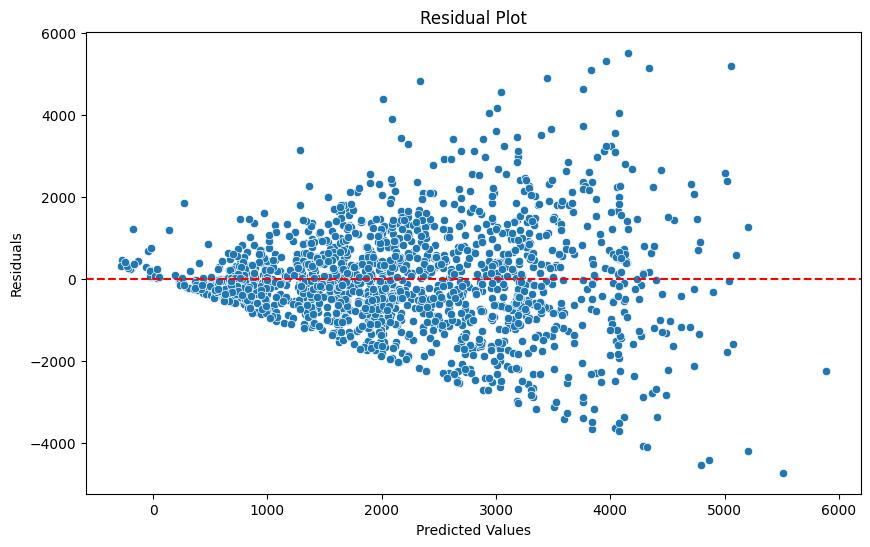

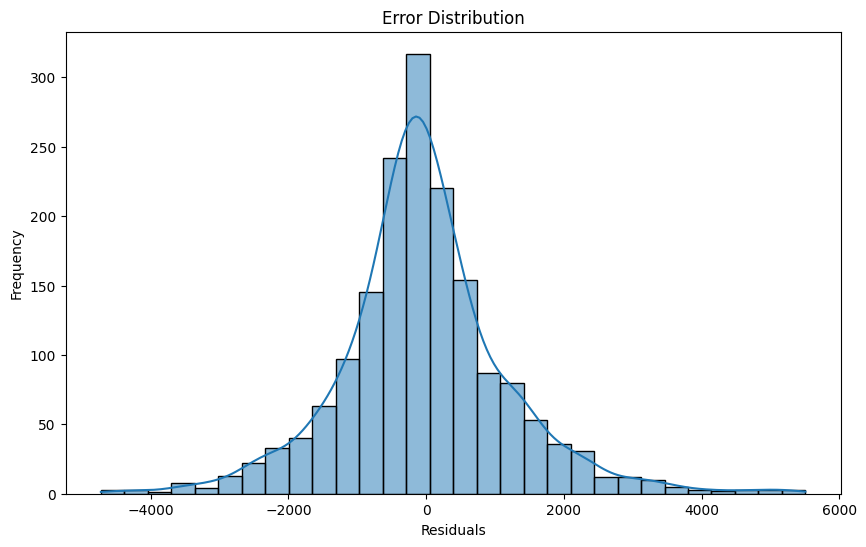

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
residuals = y_val - y_pred_best
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()


In [69]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: shap in c:\users\suraj_r3os3ti\appdata\local\programs\python\python311\lib\site-packages (0.46.0)




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


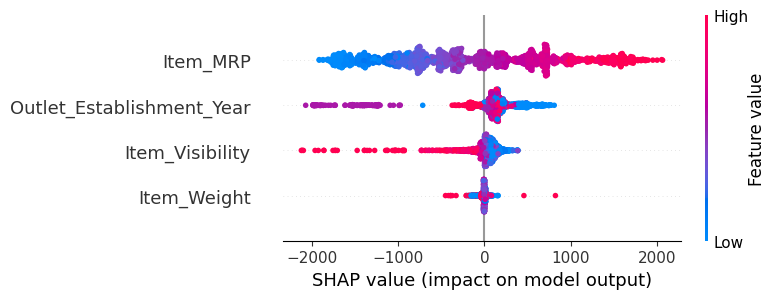

In [70]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_xgb, X_train_scaled)
shap_values = explainer(X_val_scaled)

# Summary plot
shap.summary_plot(shap_values, X_val)


In [71]:
pip install onnxmltools skl2onnx


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
import xgboost as xgb
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType

# Define input type for ONNX conversion
initial_type = [("float_input", FloatTensorType([None, X_train_scaled.shape[1]]))]

# Convert XGBoost model to ONNX format
onnx_model = onnxmltools.convert_xgboost(best_xgb, initial_types=initial_type)

# Save the ONNX model
with open("BigMart_XGBoost_Model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ XGBoost model successfully converted to ONNX format!")


✅ XGBoost model successfully converted to ONNX format!
